In [3]:
from pandas.io.json import json_normalize
import pandas as pd
import json

In [59]:
data_str=open('CMID.json',encoding='utf-8').read()
data_list=json.loads(data_str)
data=[[d['originalText'],d['entities'],d['seg_result'],d['label_4class'],d['label_36class']] for d in data_list]
print(len(data))
df_2=pd.DataFrame(data,columns=['originalText','entities','seg_result','label_4class','label_36class'])
df_2.head()

12254


,originalText,entities,seg_result,label_4class,label_36class
0,在县医院确诊肺结核，吃免费抗结核药一个半月，咳嗽加重，咳痰有血丝，需要怎样进一步治疗,"[{'label_type': '疾病和诊断', 'start_pos': 6, 'end_...","[在, 县, 医院, 确诊, 肺结核, ，, 吃, 免费, 抗结核, 药, 一个半月, ，,...",['病症'],['治疗方法']
1,肚子上长了些红色痘是风疹吗？,[],"[肚子, 上长, 了, 些, 红色, 痘, 是, 风疹, 吗, ？]",['病症'],['定义']
2,肚子上长红色痘会有可能是风疹吗,[],"[肚子, 上长, 红色, 痘, 会, 有, 可能, 是, 风疹, 吗]",['病症'],['定义']
3,肚子上长痘会是风疹吗,[],"[肚子, 上长, 痘, 会, 是, 风疹, 吗]",['病症'],['定义']
4,两天前开始喉咙痛，咽喉部有浓痰，睡觉痰有影响呼吸问题，头痛，今天凌晨开始流鼻涕，腿软,"[{'label_type': '解剖部位', 'start_pos': 5, 'end_p...","[两天, 前, 开始, 喉咙痛, ，, 咽喉部, 有, 浓痰, ，, 睡觉, 痰, 有, 影...",['病症'],['临床表现(病症表现)']


In [5]:
df=df_2

In [6]:
print("在 original列中总共有 %d 个空值." % df['originalText'].isnull().sum())

df[df.isnull().values==True]


在 original列中总共有 0 个空值.


,originalText,entities,seg_result,label_4class,label_36class


In [7]:
df['label_4class']

0        ['病症']
1        ['病症']
2        ['病症']
3        ['病症']
4        ['病症']
          ...  
12249      [病症]
12250      [病症]
12251      [病症]
12252      [病症]
12253      [病症]
Name: label_4class, Length: 12254, dtype: object

In [8]:
d = {'label_4class':df['label_4class'].value_counts().index, 'count': df['label_4class'].value_counts()}
df_label_4class= pd.DataFrame(data=d).reset_index(drop=True)
df_label_4class

,label_4class,count
0,['病症'],3994
1,[病症],2270
2,['药物'],1779
3,['其他'],1314
4,[其他],1017
5,[药物],977
6,['治疗方案'],667
7,[治疗方案],236


In [9]:
df

,originalText,entities,seg_result,label_4class,label_36class
0,在县医院确诊肺结核，吃免费抗结核药一个半月，咳嗽加重，咳痰有血丝，需要怎样进一步治疗,"[{'label_type': '疾病和诊断', 'start_pos': 6, 'end_...","[在, 县, 医院, 确诊, 肺结核, ，, 吃, 免费, 抗结核, 药, 一个半月, ，,...",['病症'],['治疗方法']
1,肚子上长了些红色痘是风疹吗？,[],"[肚子, 上长, 了, 些, 红色, 痘, 是, 风疹, 吗, ？]",['病症'],['定义']
2,肚子上长红色痘会有可能是风疹吗,[],"[肚子, 上长, 红色, 痘, 会, 有, 可能, 是, 风疹, 吗]",['病症'],['定义']
3,肚子上长痘会是风疹吗,[],"[肚子, 上长, 痘, 会, 是, 风疹, 吗]",['病症'],['定义']
4,两天前开始喉咙痛，咽喉部有浓痰，睡觉痰有影响呼吸问题，头痛，今天凌晨开始流鼻涕，腿软,"[{'label_type': '解剖部位', 'start_pos': 5, 'end_p...","[两天, 前, 开始, 喉咙痛, ，, 咽喉部, 有, 浓痰, ，, 睡觉, 痰, 有, 影...",['病症'],['临床表现(病症表现)']
...,...,...,...,...,...
12249,有一次不太干净的性生活，没有任何保护措施，事后一直没有症状出现，但是随后的几天后发现生殖器上...,[],"[有, 一次, 不太, 干净, 的, 性生活, ，, 没有, 任何, 保护措施, ，, 事后...",[病症],[治愈率]
12250,这几天我的下面出现了很多红斑，还总是觉得疼和痒，可是抓过之后就会起水泡，水泡破裂后还有流脓的...,[],"[这, 几天, 我, 的, 下面, 出现, 了, 很多, 红斑, ，, 还, 总是, 觉得,...",[病症],[病症禁忌]
12251,这一段时间不知是什么原因，检查出患有生殖器疱疹的毛病，也不是很了解这种病，所以感觉特别的害怕...,[],"[这, 一段时间, 不知, 是, 什么, 原因, ，, 检查, 出, 患有, 生殖器疱疹, ...",[病症],[治疗方法]
12252,半个月前我发现自己的下面长了几个小痘痘，不疼不痒的也没在意，后来越来越多，还在不断的扩散，我...,[],"[半个, 月前, 我, 发现自己, 的, 下面, 长, 了, 几个, 小, 痘痘, ，, 不...",[病症],[治疗方法]


In [10]:
df['label_4class']

0        ['病症']
1        ['病症']
2        ['病症']
3        ['病症']
4        ['病症']
          ...  
12249      [病症]
12250      [病症]
12251      [病症]
12252      [病症]
12253      [病症]
Name: label_4class, Length: 12254, dtype: object

In [11]:
df['label_4class'][2]

["'病症'"]

In [12]:
df['label_4class'][12250]

['病症']

In [13]:
for i in range(12254):
    if df['label_4class'][i]==["'病症'"] or df['label_4class'][i]==['病症']:
        df['label_4class'][i]=int(0)

In [14]:
for i in range(12254):
    if df['label_4class'][i]==["'药物'"] or df['label_4class'][i]==['药物']:
        df['label_4class'][i]=int(1)

In [15]:
for i in range(12254):
    if df['label_4class'][i]==["'治疗方案'"] or df['label_4class'][i]==['治疗方案']:
        df['label_4class'][i]=int(2)

In [16]:
for i in range(12254):
    if df['label_4class'][i]==["'其他'"] or df['label_4class'][i]==['其他']:
        df['label_4class'][i]=int(3)

In [17]:
d = {'label_4class':df['label_4class'].value_counts().index, 'count': df['label_4class'].value_counts()}
df_label_4class= pd.DataFrame(data=d).reset_index(drop=True)
df_label_4class

,label_4class,count
0,0,6264
1,1,2756
2,3,2331
3,2,903


In [18]:
#定义删除除字母,数字，汉字以外的所有符号的函数
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line
 
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  
 
#加载停用词
stopwords = stopwordslist("chineseStopWords.txt")

In [19]:

%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import jieba as jb
import re

In [20]:
#分词，并过滤停用词
df['cut_originalText'] = df['originalText'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
df.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zyh\AppData\Local\Temp\jieba.cache
Loading model cost 1.181 seconds.
Prefix dict has been built successfully.


,originalText,entities,seg_result,label_4class,label_36class,cut_originalText
0,在县医院确诊肺结核，吃免费抗结核药一个半月，咳嗽加重，咳痰有血丝，需要怎样进一步治疗,"[{'label_type': '疾病和诊断', 'start_pos': 6, 'end_...","[在, 县, 医院, 确诊, 肺结核, ，, 吃, 免费, 抗结核, 药, 一个半月, ，,...",0,['治疗方法'],县 医院 确诊 肺结核 吃 免费 抗结核 药 一个半月 咳嗽 加重 咳痰 血丝 需要 进一步 治疗
1,肚子上长了些红色痘是风疹吗？,[],"[肚子, 上长, 了, 些, 红色, 痘, 是, 风疹, 吗, ？]",0,['定义'],肚子 上长 红色 痘 风疹
2,肚子上长红色痘会有可能是风疹吗,[],"[肚子, 上长, 红色, 痘, 会, 有, 可能, 是, 风疹, 吗]",0,['定义'],肚子 上长 红色 痘 会 可能 风疹
3,肚子上长痘会是风疹吗,[],"[肚子, 上长, 痘, 会, 是, 风疹, 吗]",0,['定义'],肚子 上长 痘 会 风疹
4,两天前开始喉咙痛，咽喉部有浓痰，睡觉痰有影响呼吸问题，头痛，今天凌晨开始流鼻涕，腿软,"[{'label_type': '解剖部位', 'start_pos': 5, 'end_p...","[两天, 前, 开始, 喉咙痛, ，, 咽喉部, 有, 浓痰, ，, 睡觉, 痰, 有, 影...",0,['临床表现(病症表现)'],两天 前 喉咙痛 咽喉部 浓痰 睡觉 痰 影响 呼吸 问题 头痛 今天 凌晨 流鼻涕 腿软


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(df.cut_originalText)
labels = df.label_4class
print(features.shape)
print('-----------------------------')
print(features)

(12254, 72191)
-----------------------------
  (0, 66996)	0.2251710031274606
  (0, 69887)	0.2128229443796337
  (0, 62397)	0.23497220874867109
  (0, 20401)	0.23497220874867109
  (0, 14563)	0.23497220874867109
  (0, 20219)	0.23497220874867109
  (0, 2278)	0.23497220874867109
  (0, 36365)	0.23497220874867109
  (0, 11595)	0.23497220874867109
  (0, 58350)	0.23497220874867109
  (0, 53990)	0.23497220874867109
  (0, 15541)	0.2128229443796337
  (0, 45381)	0.06594292205105101
  (0, 66993)	0.19606767270131703
  (0, 69789)	0.10917706984713198
  (0, 62385)	0.1770084921258443
  (0, 20388)	0.18626646708010652
  (0, 14558)	0.17490518809251052
  (0, 20170)	0.11685008101164006
  (0, 2276)	0.20468948601045303
  (0, 36364)	0.2128229443796337
  (0, 11594)	0.2251710031274606
  (0, 58345)	0.16951119540178983
  (0, 53954)	0.14937749360002767
  (0, 15360)	0.08876205276479945
  :	:
  (12253, 63960)	0.14320384859794869
  (12253, 41802)	0.1281252267316189
  (12253, 2201)	0.11846141190531183
  (12253, 44291)	0.2330

In [22]:
labels.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 2,
 1,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 3,


In [23]:
type(features)

scipy.sparse.csr.csr_matrix

In [24]:
df['cut_originalText']

0        县 医院 确诊 肺结核 吃 免费 抗结核 药 一个半月 咳嗽 加重 咳痰 血丝 需要 进一步 治疗
1                                            肚子 上长 红色 痘 风疹
2                                       肚子 上长 红色 痘 会 可能 风疹
3                                             肚子 上长 痘 会 风疹
4            两天 前 喉咙痛 咽喉部 浓痰 睡觉 痰 影响 呼吸 问题 头痛 今天 凌晨 流鼻涕 腿软
                               ...                        
12249    一次 不太 干净 性生活 没有 保护措施 事后 一直 没有 症状 出现 几天 发现 生殖器 ...
12250    几天 下面 出现 很多 红斑 总是 觉得 疼 痒 抓 之后 会 起水泡 水泡 破裂 流脓 现...
12251    一段时间 不知 原因 检查 出 患有 生殖器 疱疹 毛病 了解 这种 病 感觉 特别 害怕 ...
12252    半个 月 前 发现自己 下面 长 几个 痘痘 不疼不痒 没 在意 后来 越来越 不断 扩散 ...
12253    一个 朋友 患有 生殖器 疱疹 毛病 已经 一年 试过 方法 治疗 无法 彻底 治愈 两天 ...
Name: cut_originalText, Length: 12254, dtype: object

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
 
X_train, X_test, y_train, y_test = train_test_split(df['cut_originalText'], df['label_4class'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
y_train=y_train.astype('int')
clf = MultinomialNB().fit(X_train_tfidf, y_train)
y_test=y_test.astype('int')
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred=clf.predict(X_test_tfidf)
from sklearn.metrics import classification_report
 

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.98      0.77      1572
           1       0.72      0.64      0.68       691
           2       0.00      0.00      0.00       208
           3       0.54      0.03      0.06       593

    accuracy                           0.65      3064
   macro avg       0.48      0.41      0.38      3064
weighted avg       0.59      0.65      0.56      3064

0.6524151436031331


G:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df['cut_originalText'], df['label_4class'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
y_train=y_train.astype('int')
clf = RandomForestClassifier().fit(X_train_tfidf, y_train)
y_test=y_test.astype('int')
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred=clf.predict(X_test_tfidf)
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.87      0.78      1572
           1       0.68      0.72      0.70       691
           2       0.57      0.20      0.30       208
           3       0.45      0.23      0.31       593

    accuracy                           0.67      3064
   macro avg       0.60      0.51      0.52      3064
weighted avg       0.64      0.67      0.64      3064

0.6664490861618799


0.6657963446475196
              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1572
           1       0.67      0.73      0.70       691
           2       0.53      0.22      0.31       208
           3       0.45      0.23      0.31       593

    accuracy                           0.67      3064
   macro avg       0.59      0.51      0.52      3064
weighted avg       0.64      0.67      0.63      3064

[[1354   86   27  105]
 [ 133  504    4   50]
 [ 130   22   45   11]
 [ 311  136    9  137]]


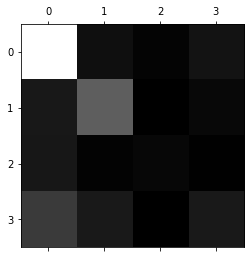

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(df['cut_originalText'], df['label_4class'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
y_train=y_train.astype('int')
clf = RandomForestClassifier().fit(X_train_tfidf, y_train)
y_test=y_test.astype('int')
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred=clf.predict(X_test_tfidf)
from sklearn.metrics import classification_report

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
cfm = confusion_matrix(y_test, y_pred)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()